# RFM Analysis With Python Via K Means Clustering 

# Introduction

This article is a walk thru of how to use Python to calculate the RFM using a publicly available set of transactional 
purchase records and customer details from a Brazilian e-commerce site 
<https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce>. 
    
The RFM data is then manually used to build a customer segmentation scheme and finally the article will explore a 
machine learning method called K Means Clustering to automate the same segmentation task and see if it provides any 
deeper insights

This site has an accompanying article on Medium here 

https://zhijingeu.medium.com/building-a-rfm-segmentation-with-python-k-means-clustering-3a8f3c202fa5

# <b>Data Exploration & Preparation<b>

In [68]:
import pandas as pd
import numpy as np
import os

In [ ]:
root_dir = os.getcwd()
print(root_dir)

In [70]:
customers = pd.read_csv(root_dir + "\\olist_customers_dataset.csv")
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [71]:
orders = pd.read_csv(root_dir + "\\olist_orders_dataset.csv")
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [72]:
orderitems = pd.read_csv(root_dir + "\\olist_order_items_dataset.csv")
orderitems

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [73]:
orderpay=pd.read_csv(root_dir + "\\olist_order_payments_dataset.csv")
orderpay

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [74]:
products = pd.read_csv(root_dir + "\\olist_products_dataset.csv")
products=products[['product_id','product_category_name']]
products

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios


In [75]:
#Building the merged dataset

data = customers.copy()
data = pd.merge(data, orders, on='customer_id')
data = pd.merge(data, orderitems, on='order_id')
data = pd.merge(data, orderpay, on='order_id')
data = pd.merge(data, products, on='product_id')

In [76]:
data.describe(include='object').T

,count,unique,top,freq
customer_id,117601,98665,270c23a11d024a44c896d1894b261a83,63
customer_unique_id,117601,95419,9a736b248f67d166d2fbb006bcb877c3,75
customer_city,117601,4110,sao paulo,18590
customer_state,117601,27,SP,49566
order_id,117601,98665,895ab968e7bb0d5659d16cd74cd1650c,63
order_status,117601,7,delivered,115035
order_purchase_timestamp,117601,98111,2017-08-08 20:26:31,63
order_approved_at,117586,90173,2017-08-08 20:43:31,63
order_delivered_carrier_date,116356,81016,2017-08-10 11:58:14,63
order_delivered_customer_date,115034,95663,2017-08-14 12:46:18,63


In [77]:
data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,1,credit_card,2,146.87,moveis_escritorio
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,1,credit_card,8,335.48,utilidades_domesticas
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,1,credit_card,7,157.73,moveis_escritorio
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,1,credit_card,1,173.30,moveis_escritorio
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,1,credit_card,8,252.25,casa_conforto


In [78]:
#Basic data cleaning by dropping any rows with NaN or Blanks
data.dropna(inplace=True)

In [79]:
data.describe(include='object').T

,count,unique,top,freq
customer_id,113391,95129,270c23a11d024a44c896d1894b261a83,63
customer_unique_id,113391,92082,9a736b248f67d166d2fbb006bcb877c3,75
customer_city,113391,4073,sao paulo,17868
customer_state,113391,27,SP,47830
order_id,113391,95129,895ab968e7bb0d5659d16cd74cd1650c,63
order_status,113391,2,delivered,113384
order_purchase_timestamp,113391,94625,2017-08-08 20:26:31,63
order_approved_at,113391,87125,2017-08-08 20:43:31,63
order_delivered_carrier_date,113391,78921,2017-08-10 11:58:14,63
order_delivered_customer_date,113391,94341,2017-08-14 12:46:18,63


In [80]:
data['order_purchase_timestamp']=pd.to_datetime(data['order_purchase_timestamp'], format= '%Y-%m-%d %H:%M:%S')
min_date=min(data['order_purchase_timestamp'])
max_date = max(data['order_purchase_timestamp'])

In [81]:
display("Max Date: "+str(max_date))
display("Min Date: "+str(min_date))
display("Total Dur Days: " +str((max_date-min_date).days))
display("Total Dur Weeks: " +str(round((max_date-min_date).days/7,1)))
display("Total Dur Mths: " +str(round((max_date-min_date).days/30.417,1)))


'Max Date: 2018-08-29 15:00:37'

'Min Date: 2016-10-03 09:44:50'

'Total Dur Days: 695'

'Total Dur Weeks: 99.3'

'Total Dur Mths: 22.8'

# Building The RFM Metrics

count    92082.000000
mean       236.800775
std        152.593172
min          0.000000
25%        113.000000
50%        218.000000
75%        345.000000
max        695.000000
Name: Recency In Days, dtype: float64

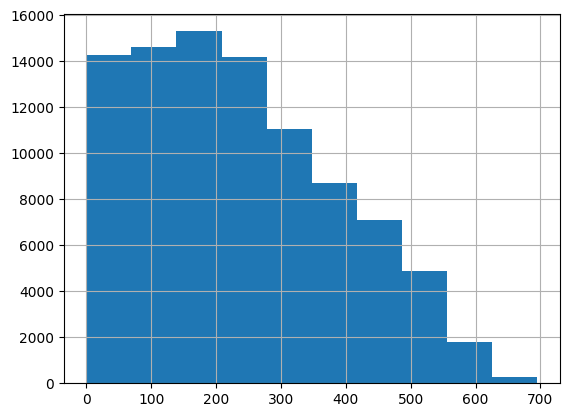

In [82]:
#group items by unique customers and find the latest (most recent) order date
recency_df = data.groupby(by = 'customer_unique_id', as_index = False)['order_purchase_timestamp'].max()

recency_df["recency"]=max_date-recency_df['order_purchase_timestamp']

#rounding so it is to the nearest number of days
recency_df["recency"]=recency_df["recency"].dt.round("d")

recency_df.rename(columns = {'order_purchase_timestamp':'Most Recent Order Date', "recency":"Recency In Days"}, inplace = True)

#Converting this into a float figure or else the Histogram will not work with time delta data types
recency_df['Recency In Days'] = recency_df['Recency In Days'] / pd.to_timedelta(1, unit='D')

recency_df['Recency In Days'].hist()
recency_df['Recency In Days'].describe()

count    92082.000000
mean         1.033090
std          0.206858
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         14.000000
Name: Frequency, dtype: float64

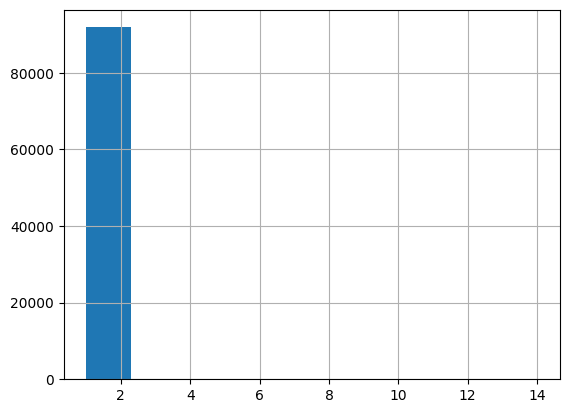

In [83]:
frequency_df = data.groupby(["customer_unique_id"]).agg({"order_id": "nunique"}).reset_index()
frequency_df.sort_values('order_id', ascending=[False])
frequency_df.rename(columns = {'order_id':'Frequency'}, inplace = True)
frequency_df['Frequency'].hist()
frequency_df['Frequency'].describe()

In [84]:
frequency_df['Frequency'].value_counts()

Frequency
1     89341
2      2520
3       175
4        29
5         9
6         3
7         3
9         1
14        1
Name: count, dtype: int64

,Monetary Value
count,92082.000000
mean,212.120331
std,643.649055
min,9.590000
25%,63.830000
50%,112.820000
75%,202.157500
max,109312.640000


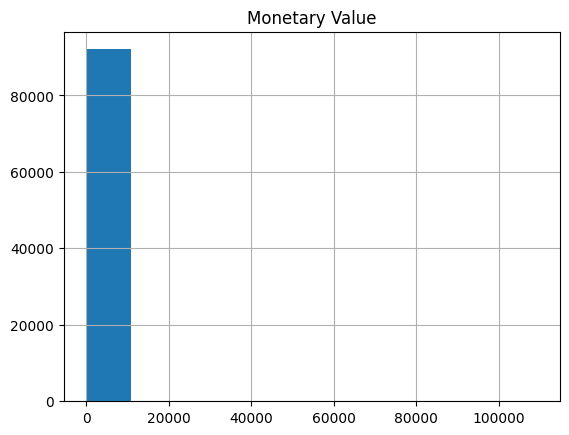

In [85]:
monetary_df = data.groupby('customer_unique_id', as_index = False)['payment_value'].sum()
monetary_df.rename(columns = {'payment_value':'Monetary Value'}, inplace = True)
monetary_df.hist()
monetary_df.describe()

In [86]:
monetary_df['Monetary Value'].quantile(0.99)

1673.0350000000012

<Axes: >

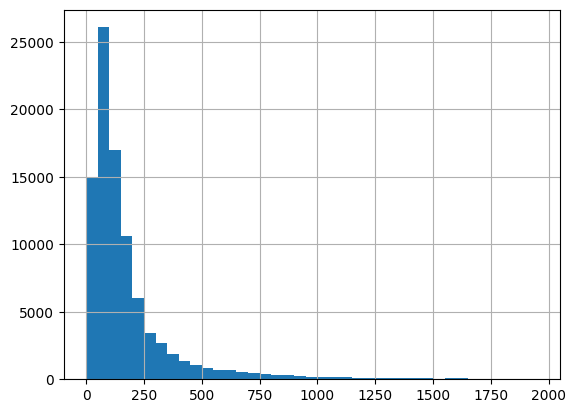

In [87]:
monetary_df['Monetary Value'].hist(bins = range(0,2000,50))

<Axes: >

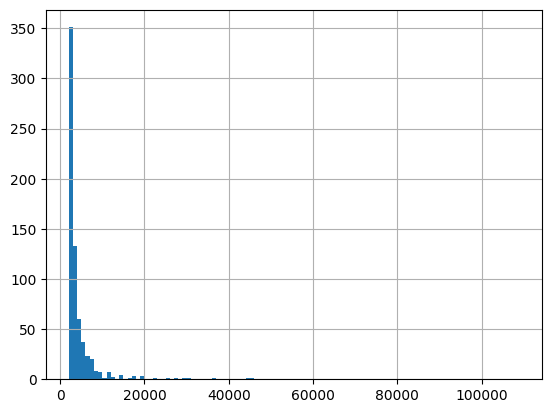

In [88]:
monetary_df['Monetary Value'].hist(bins = range(2000,110000,1000))

In [89]:
RFM = frequency_df.copy()
RFM = pd.merge(RFM, recency_df, on='customer_unique_id')
RFM = pd.merge(RFM, monetary_df, on='customer_unique_id')

#Rearranging the columns for readability
RFM=RFM[['customer_unique_id','Recency In Days','Most Recent Order Date','Frequency',"Monetary Value"]]

print(RFM.describe())
RFM.sort_values('Frequency',ascending=[False])

       Recency In Days         Most Recent Order Date     Frequency  \
count     92082.000000                          92082  92082.000000   
mean        236.800775  2018-01-04 21:02:42.372266240      1.033090   
min           0.000000            2016-10-03 16:56:50      1.000000   
25%         113.000000  2017-09-18 14:28:47.249999872      1.000000   
50%         218.000000     2018-01-23 21:05:05.500000      1.000000   
75%         345.000000            2018-05-08 10:35:06      1.000000   
max         695.000000            2018-08-29 15:00:37     14.000000   
std         152.593172                            NaN      0.206858   

       Monetary Value  
count    92082.000000  
mean       212.120331  
min          9.590000  
25%         63.830000  
50%        112.820000  
75%        202.157500  
max     109312.640000  
std        643.649055  


,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value
50739,8d50f5eadf50201ccdcedfb9e2ac8455,9.0,2018-08-20 19:14:26,14,797.38
22477,3e43e6105506432c953e165fb2acf44c,183.0,2018-02-27 18:36:39,9,1963.58
36210,6469f99c1f9dfae7733b25662e7f1782,63.0,2018-06-28 00:43:34,7,973.09
9927,1b6c7548a2a1f9037c1fd3ddfed95f33,196.0,2018-02-14 13:22:12,7,1386.54
72928,ca77025e7201e3b30c44b472ff346268,89.0,2018-06-01 11:38:29,7,2126.44
...,...,...,...,...,...
31130,56509f7bc43892a0da09ee14f50a6f84,225.0,2018-01-16 22:34:16,1,211.89
31129,564feb90710b4f84399f931fa97ea704,513.0,2017-04-03 22:43:45,1,330.27
31128,564fb2956ed34f0a78c1cc37d731f3d9,357.0,2017-09-06 09:44:50,1,217.06
31127,564f89ca1f5371992bf1fb87a0331ac3,64.0,2018-06-26 09:08:03,1,211.56


# Adding A Few Additional Features To RFM - Age , Ave Time Between Orders and Ave Monetary Value Per Order

                 Earliest Order Date   Age In Days
count                          92082  92082.000000
mean   2018-01-02 06:13:04.941878016    239.418725
min              2016-10-03 09:44:50      0.000000
25%              2017-09-14 07:28:37    115.000000
50%       2018-01-21 11:41:25.500000    220.000000
75%    2018-05-06 16:03:10.750000128    349.000000
max              2018-08-29 15:00:37    695.000000
std                              NaN    153.104399


<Axes: >

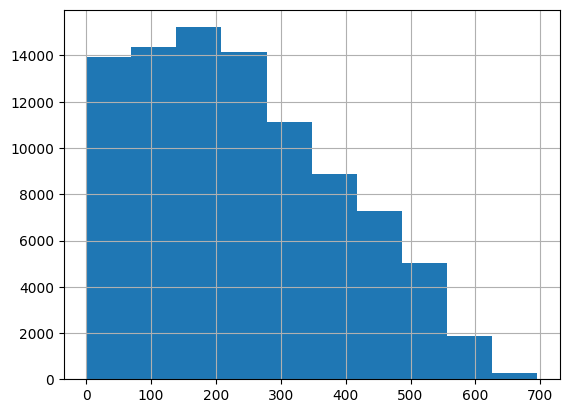

In [90]:
earliest_order_date=pd.DataFrame(data.groupby(['customer_unique_id'])['order_purchase_timestamp'].min())
earliest_order_date.rename(columns = {'order_purchase_timestamp':'Earliest Order Date'}, inplace = True)
earliest_order_date["Age"]=(max_date-earliest_order_date["Earliest Order Date"]).dt.round("d")
earliest_order_date['Age In Days'] = earliest_order_date['Age'] / pd.to_timedelta(1, unit='D')
earliest_order_date.drop(['Age'], axis=1, inplace=True)
print(earliest_order_date.describe())
earliest_order_date["Age In Days"].hist()


In [91]:
earliest_order_date

,Earliest Order Date,Age In Days
customer_unique_id,,
0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,111.0
0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,114.0
0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,537.0
0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,321.0
0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,288.0
...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36,447.0
fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56,262.0
ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16,568.0


In [92]:
RFM

,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value
0,0000366f3b9a7992bf8c76cfdf3221e2,111.0,2018-05-10 10:56:27,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114.0,2018-05-07 11:11:27,1,27.19
2,0000f46a3911fa3c0805444483337064,537.0,2017-03-10 21:05:03,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,321.0,2017-10-12 20:29:41,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,288.0,2017-11-14 19:45:42,1,196.89
...,...,...,...,...,...
92077,fffcf5a5ff07b0908bd4e2dbc735a684,447.0,2017-06-08 21:00:36,1,4134.84
92078,fffea47cd6d3cc0a88bd621562a9d061,262.0,2017-12-10 20:07:56,1,84.58
92079,ffff371b4d645b6ecea244b27531430a,568.0,2017-02-07 15:49:16,1,112.46
92080,ffff5962728ec6157033ef9805bacc48,119.0,2018-05-02 15:17:41,1,133.69


In [93]:
#Merge the "Age" data with the RFM data
RFM = pd.merge(RFM, earliest_order_date, on='customer_unique_id')

#Calculate the Average Time Between Orders and Average Monetary Value Per Order
RFM["Average Time Between Orders In Days"]=RFM['Age In Days']/RFM['Frequency']

#Calculate the Average Monetary Value Per Order
RFM["Average Monetary Value Per Order"]=RFM['Monetary Value']/RFM['Frequency']

RFM.sort_values('Frequency',ascending=[False])

,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order
50739,8d50f5eadf50201ccdcedfb9e2ac8455,9.0,2018-08-20 19:14:26,14,797.38,2017-06-18 22:56:48,437.0,31.214286,56.955714
22477,3e43e6105506432c953e165fb2acf44c,183.0,2018-02-27 18:36:39,9,1963.58,2017-09-18 18:53:15,345.0,38.333333,218.175556
36210,6469f99c1f9dfae7733b25662e7f1782,63.0,2018-06-28 00:43:34,7,973.09,2017-09-19 01:02:44,345.0,49.285714,139.012857
9927,1b6c7548a2a1f9037c1fd3ddfed95f33,196.0,2018-02-14 13:22:12,7,1386.54,2017-11-13 16:44:41,289.0,41.285714,198.077143
72928,ca77025e7201e3b30c44b472ff346268,89.0,2018-06-01 11:38:29,7,2126.44,2017-10-09 12:34:39,324.0,46.285714,303.777143
...,...,...,...,...,...,...,...,...,...
31130,56509f7bc43892a0da09ee14f50a6f84,225.0,2018-01-16 22:34:16,1,211.89,2018-01-16 22:34:16,225.0,225.000000,211.890000
31129,564feb90710b4f84399f931fa97ea704,513.0,2017-04-03 22:43:45,1,330.27,2017-04-03 22:43:45,513.0,513.000000,330.270000
31128,564fb2956ed34f0a78c1cc37d731f3d9,357.0,2017-09-06 09:44:50,1,217.06,2017-09-06 09:44:50,357.0,357.000000,217.060000
31127,564f89ca1f5371992bf1fb87a0331ac3,64.0,2018-06-26 09:08:03,1,211.56,2018-06-26 09:08:03,64.0,64.000000,211.560000


In [94]:
RFM.describe()

,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order
count,92082.000000,92082,92082.000000,92082.000000,92082,92082.000000,92082.000000,92082.000000
mean,236.800775,2018-01-04 21:02:42.372266240,1.033090,212.120331,2018-01-02 06:13:04.941878016,239.418725,234.685704,204.902947
min,0.000000,2016-10-03 16:56:50,1.000000,9.590000,2016-10-03 09:44:50,0.000000,0.000000,9.590000
25%,113.000000,2017-09-18 14:28:47.249999872,1.000000,63.830000,2017-09-14 07:28:37,115.000000,113.000000,63.120000
50%,218.000000,2018-01-23 21:05:05.500000,1.000000,112.820000,2018-01-21 11:41:25.500000,220.000000,215.000000,110.080000
75%,345.000000,2018-05-08 10:35:06,1.000000,202.157500,2018-05-06 16:03:10.750000128,349.000000,341.000000,196.010000
max,695.000000,2018-08-29 15:00:37,14.000000,109312.640000,2018-08-29 15:00:37,695.000000,695.000000,109312.640000
std,152.593172,NaN,0.206858,643.649055,NaN,153.104399,151.823810,620.997673


# Building RFM Quartile Scores

In [95]:
RFM['R Quartile Score'] = pd.qcut(RFM['Recency In Days'], 4, labels=False)

#Resetting the Quartiles so that customers with lower recency are Top Quartile i.e Score of 4
RFM['R Quartile Score'] = RFM['R Quartile Score'].replace([0,1,2,3], [4,3,2,1])

RFM.sort_values('Recency In Days')

,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order,R Quartile Score
43982,7a22d14aa3c3599238509ddca4b93b01,0.0,2018-08-29 12:25:59,1,73.10,2018-08-29 12:25:59,0.0,0.0,73.10,4
4530,0c6d7218d5f3fa14514fd29865269993,0.0,2018-08-29 09:48:09,1,178.25,2018-08-29 09:48:09,0.0,0.0,178.25,4
65923,b701bebbdf478f5500348f03aff62121,0.0,2018-08-29 14:52:00,1,33.23,2018-08-29 14:52:00,0.0,0.0,33.23,4
63354,afbcfd0b9c5233e7ccc73428526fbb52,0.0,2018-08-29 08:46:11,1,2486.25,2018-08-29 08:46:11,0.0,0.0,2486.25,4
65162,b4dcade04bc548b7e3b0243c801f8c26,0.0,2018-08-29 09:14:11,1,106.95,2018-08-29 09:14:11,0.0,0.0,106.95,4
...,...,...,...,...,...,...,...,...,...,...
66547,b8b8726af116a5cfb35b0315ecef9172,695.0,2016-10-03 21:01:41,1,35.61,2016-10-03 21:01:41,695.0,695.0,35.61,1
41659,7390ed59fa1febbfda31a80b4318c8cb,695.0,2016-10-03 22:44:10,1,154.57,2016-10-03 22:44:10,695.0,695.0,154.57,1
50708,8d3a54507421dbd2ce0a1d58046826e0,695.0,2016-10-03 22:06:03,1,133.46,2016-10-03 22:06:03,695.0,695.0,133.46,1
17123,2f64e403852e6893ae37485d5fcacdaf,695.0,2016-10-03 16:56:50,1,39.09,2016-10-03 16:56:50,695.0,695.0,39.09,1


In [96]:
#Dont run but left for illustration only to show the error that occurs
#RFM['F Quartile Score'] = pd.qcut(RFM['Frequency'], 4, labels=False)


In [97]:
#Because there are so many Freq = 1 customers it causes a Bin Edges Unique ValueError. So use ranking first before qcut

RFM['F Quartile Score'] = pd.qcut(RFM['Frequency'].rank(method='first'), 4, labels=False)

#Resetting the Quartiles so that customers with higher frequency are in the Top Quartile i.e Score of 4
RFM['F Quartile Score'] = RFM['F Quartile Score'].replace([0,1,2,3], [1,2,3,4])

RFM.sort_values('Frequency',ascending=[False])


,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order,R Quartile Score,F Quartile Score
50739,8d50f5eadf50201ccdcedfb9e2ac8455,9.0,2018-08-20 19:14:26,14,797.38,2017-06-18 22:56:48,437.0,31.214286,56.955714,4,4
22477,3e43e6105506432c953e165fb2acf44c,183.0,2018-02-27 18:36:39,9,1963.58,2017-09-18 18:53:15,345.0,38.333333,218.175556,3,4
36210,6469f99c1f9dfae7733b25662e7f1782,63.0,2018-06-28 00:43:34,7,973.09,2017-09-19 01:02:44,345.0,49.285714,139.012857,4,4
9927,1b6c7548a2a1f9037c1fd3ddfed95f33,196.0,2018-02-14 13:22:12,7,1386.54,2017-11-13 16:44:41,289.0,41.285714,198.077143,3,4
72928,ca77025e7201e3b30c44b472ff346268,89.0,2018-06-01 11:38:29,7,2126.44,2017-10-09 12:34:39,324.0,46.285714,303.777143,4,4
...,...,...,...,...,...,...,...,...,...,...,...
31130,56509f7bc43892a0da09ee14f50a6f84,225.0,2018-01-16 22:34:16,1,211.89,2018-01-16 22:34:16,225.0,225.000000,211.890000,2,2
31129,564feb90710b4f84399f931fa97ea704,513.0,2017-04-03 22:43:45,1,330.27,2017-04-03 22:43:45,513.0,513.000000,330.270000,1,2
31128,564fb2956ed34f0a78c1cc37d731f3d9,357.0,2017-09-06 09:44:50,1,217.06,2017-09-06 09:44:50,357.0,357.000000,217.060000,1,2
31127,564f89ca1f5371992bf1fb87a0331ac3,64.0,2018-06-26 09:08:03,1,211.56,2018-06-26 09:08:03,64.0,64.000000,211.560000,4,2


In [98]:
RFM['Frequency'].value_counts()

Frequency
1     89341
2      2520
3       175
4        29
5         9
6         3
7         3
9         1
14        1
Name: count, dtype: int64

In [99]:
RFM['M Quartile Score'] =  pd.qcut(RFM['Monetary Value'], 4, labels=False)

#Resetting the Quartiles so that customers with higher Monetary Value are in the Top Quartile i.e Score of 4
RFM['M Quartile Score'] = RFM['M Quartile Score'].replace([0,1,2,3], [1,2,3,4])

RFM.sort_values('Frequency',ascending=[False])

,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order,R Quartile Score,F Quartile Score,M Quartile Score
50739,8d50f5eadf50201ccdcedfb9e2ac8455,9.0,2018-08-20 19:14:26,14,797.38,2017-06-18 22:56:48,437.0,31.214286,56.955714,4,4,4
22477,3e43e6105506432c953e165fb2acf44c,183.0,2018-02-27 18:36:39,9,1963.58,2017-09-18 18:53:15,345.0,38.333333,218.175556,3,4,4
36210,6469f99c1f9dfae7733b25662e7f1782,63.0,2018-06-28 00:43:34,7,973.09,2017-09-19 01:02:44,345.0,49.285714,139.012857,4,4,4
9927,1b6c7548a2a1f9037c1fd3ddfed95f33,196.0,2018-02-14 13:22:12,7,1386.54,2017-11-13 16:44:41,289.0,41.285714,198.077143,3,4,4
72928,ca77025e7201e3b30c44b472ff346268,89.0,2018-06-01 11:38:29,7,2126.44,2017-10-09 12:34:39,324.0,46.285714,303.777143,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...
31130,56509f7bc43892a0da09ee14f50a6f84,225.0,2018-01-16 22:34:16,1,211.89,2018-01-16 22:34:16,225.0,225.000000,211.890000,2,2,4
31129,564feb90710b4f84399f931fa97ea704,513.0,2017-04-03 22:43:45,1,330.27,2017-04-03 22:43:45,513.0,513.000000,330.270000,1,2,4
31128,564fb2956ed34f0a78c1cc37d731f3d9,357.0,2017-09-06 09:44:50,1,217.06,2017-09-06 09:44:50,357.0,357.000000,217.060000,1,2,4
31127,564f89ca1f5371992bf1fb87a0331ac3,64.0,2018-06-26 09:08:03,1,211.56,2018-06-26 09:08:03,64.0,64.000000,211.560000,4,2,4


In [100]:
RFM['Age Quartile Score'] =  pd.qcut(RFM['Age In Days'], 4, labels=False)

#Resetting the Quartiles so that customers with higher Age are in the Top Quartile i.e Score of 4
RFM['Age Quartile Score'] = RFM['Age Quartile Score'].replace([0,1,2,3], [1,2,3,4])

RFM.sort_values('Age In Days',ascending=[False])


,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order,R Quartile Score,F Quartile Score,M Quartile Score,Age Quartile Score
6143,10e89fd8e5c745f81bec101207ba4d7d,695.0,2016-10-03 22:51:30,1,92.27,2016-10-03 22:51:30,695.0,695.0,92.27,1,1,2,4
50708,8d3a54507421dbd2ce0a1d58046826e0,695.0,2016-10-03 22:06:03,1,133.46,2016-10-03 22:06:03,695.0,695.0,133.46,1,3,3,4
48743,87776adb449c551e74c13fc34f036105,695.0,2016-10-03 22:31:31,1,40.95,2016-10-03 22:31:31,695.0,695.0,40.95,1,3,1,4
66547,b8b8726af116a5cfb35b0315ecef9172,695.0,2016-10-03 21:01:41,1,35.61,2016-10-03 21:01:41,695.0,695.0,35.61,1,3,1,4
41659,7390ed59fa1febbfda31a80b4318c8cb,695.0,2016-10-03 22:44:10,1,154.57,2016-10-03 22:44:10,695.0,695.0,154.57,1,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65162,b4dcade04bc548b7e3b0243c801f8c26,0.0,2018-08-29 09:14:11,1,106.95,2018-08-29 09:14:11,0.0,0.0,106.95,4,3,2,1
89257,f80013faf776e37bcea7634d59c2181e,0.0,2018-08-29 08:25:34,1,74.21,2018-08-29 08:25:34,0.0,0.0,74.21,4,4,2,1
63354,afbcfd0b9c5233e7ccc73428526fbb52,0.0,2018-08-29 08:46:11,1,2486.25,2018-08-29 08:46:11,0.0,0.0,2486.25,4,3,4,1
4530,0c6d7218d5f3fa14514fd29865269993,0.0,2018-08-29 09:48:09,1,178.25,2018-08-29 09:48:09,0.0,0.0,178.25,4,1,3,1


In [101]:
RFM[(RFM["Frequency"]>1)].sort_values('Monetary Value', ascending=[False]) 

,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order,R Quartile Score,F Quartile Score,M Quartile Score,Age Quartile Score
72147,c8460e4251689ba205045f3ea17884a1,21.0,2018-08-08 14:27:15,4,27935.46,2018-08-07 09:03:02,22.0,5.5,6983.865,4,4,4,1
84602,eae0a83d752b1dd32697e0e7b4221656,127.0,2018-04-24 17:06:54,2,25051.89,2018-02-01 18:32:02,209.0,104.5,12525.945,3,4,4,2
5554,0f5ac8d5c31de21d2f25e24be15bbffb,275.0,2017-11-27 12:57:35,2,19342.26,2017-11-23 20:30:52,279.0,139.5,9671.130,2,4,4,3
51896,906a8a4ec9f3d4c3e64fa6d1c4fe6009,40.0,2018-07-20 04:05:49,2,11881.01,2018-07-05 00:58:05,56.0,28.0,5940.505,4,4,4,1
32610,5a494c648fde2d1ec4eb614274ea7159,174.0,2018-03-08 19:06:08,2,9859.88,2018-03-08 19:06:05,174.0,87.0,4929.940,3,4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52420,91e59b92e87f627abdab279ea3ab0c87,151.0,2018-03-31 13:07:07,2,38.78,2018-03-30 20:45:18,152.0,76.0,19.390,3,4,1,2
77567,d753459418d268407f19b64be28e3c5a,601.0,2017-01-05 13:43:17,2,38.24,2017-01-05 13:29:03,601.0,300.5,19.120,1,4,1,4
89185,f7be9bec658c62ab6240b44cd26c0b84,601.0,2017-01-05 14:33:39,2,38.24,2017-01-05 13:34:35,601.0,300.5,19.120,1,4,1,4
88038,f497dd3ee9e4ef33b42acd82713e4bf3,86.0,2018-06-04 12:22:27,2,37.34,2018-06-04 12:22:27,86.0,43.0,18.670,4,4,1,1


# Segmentation Via Rule Based Approach

In [102]:
def create_new_column(row):
    if row['R Quartile Score'] == 4 and row['F Quartile Score'] == 4 and row['M Quartile Score'] == 4 :
        return "Best Customer"
    
    elif row['R Quartile Score'] < 4 and row['F Quartile Score'] == 4 and row['M Quartile Score'] < 4 :
        return "Loyal Return Customers"
    
    elif row['R Quartile Score'] == 4 and row['M Quartile Score'] == 4 and row['Age Quartile Score'] ==1 :
        return "Promising New Customers"
    
    elif row['R Quartile Score'] >= 3 and row['M Quartile Score'] > 2 and (row['Age Quartile Score'] ==2 or row['Age Quartile Score'] ==3):
        return "At Risk Customers"
    
    elif row['R Quartile Score'] < 3 and row['M Quartile Score'] > 2 and (row['Age Quartile Score'] ==3 or row['Age Quartile Score'] ==4):
        return "Lost Customers"
    
    else:
        return "Other"

RFM['Manual Customer Segmentation'] = RFM.apply(lambda x: create_new_column(x), axis=1)

RFM

,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order,R Quartile Score,F Quartile Score,M Quartile Score,Age Quartile Score,Manual Customer Segmentation
0,0000366f3b9a7992bf8c76cfdf3221e2,111.0,2018-05-10 10:56:27,1,141.90,2018-05-10 10:56:27,111.0,111.0,141.90,4,1,3,1,Other
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114.0,2018-05-07 11:11:27,1,27.19,2018-05-07 11:11:27,114.0,114.0,27.19,3,1,1,1,Other
2,0000f46a3911fa3c0805444483337064,537.0,2017-03-10 21:05:03,1,86.22,2017-03-10 21:05:03,537.0,537.0,86.22,1,1,2,4,Other
3,0000f6ccb0745a6a4b88665a16c9f078,321.0,2017-10-12 20:29:41,1,43.62,2017-10-12 20:29:41,321.0,321.0,43.62,2,1,1,3,Other
4,0004aac84e0df4da2b147fca70cf8255,288.0,2017-11-14 19:45:42,1,196.89,2017-11-14 19:45:42,288.0,288.0,196.89,2,1,3,3,Lost Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92077,fffcf5a5ff07b0908bd4e2dbc735a684,447.0,2017-06-08 21:00:36,1,4134.84,2017-06-08 21:00:36,447.0,447.0,4134.84,1,4,4,4,Lost Customers
92078,fffea47cd6d3cc0a88bd621562a9d061,262.0,2017-12-10 20:07:56,1,84.58,2017-12-10 20:07:56,262.0,262.0,84.58,2,4,2,3,Loyal Return Customers
92079,ffff371b4d645b6ecea244b27531430a,568.0,2017-02-07 15:49:16,1,112.46,2017-02-07 15:49:16,568.0,568.0,112.46,1,4,2,4,Loyal Return Customers
92080,ffff5962728ec6157033ef9805bacc48,119.0,2018-05-02 15:17:41,1,133.69,2018-05-02 15:17:41,119.0,119.0,133.69,3,4,3,2,Loyal Return Customers


In [103]:
RFM["Manual Customer Segmentation"].value_counts()

Manual Customer Segmentation
Other                      44344
Lost Customers             19647
Loyal Return Customers     12372
At Risk Customers           9867
Promising New Customers     4143
Best Customer               1709
Name: count, dtype: int64

In [104]:
RFM.sort_values('Frequency', ascending=[False]) 

,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order,R Quartile Score,F Quartile Score,M Quartile Score,Age Quartile Score,Manual Customer Segmentation
50739,8d50f5eadf50201ccdcedfb9e2ac8455,9.0,2018-08-20 19:14:26,14,797.38,2017-06-18 22:56:48,437.0,31.214286,56.955714,4,4,4,4,Best Customer
22477,3e43e6105506432c953e165fb2acf44c,183.0,2018-02-27 18:36:39,9,1963.58,2017-09-18 18:53:15,345.0,38.333333,218.175556,3,4,4,3,At Risk Customers
36210,6469f99c1f9dfae7733b25662e7f1782,63.0,2018-06-28 00:43:34,7,973.09,2017-09-19 01:02:44,345.0,49.285714,139.012857,4,4,4,3,Best Customer
9927,1b6c7548a2a1f9037c1fd3ddfed95f33,196.0,2018-02-14 13:22:12,7,1386.54,2017-11-13 16:44:41,289.0,41.285714,198.077143,3,4,4,3,At Risk Customers
72928,ca77025e7201e3b30c44b472ff346268,89.0,2018-06-01 11:38:29,7,2126.44,2017-10-09 12:34:39,324.0,46.285714,303.777143,4,4,4,3,Best Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31130,56509f7bc43892a0da09ee14f50a6f84,225.0,2018-01-16 22:34:16,1,211.89,2018-01-16 22:34:16,225.0,225.000000,211.890000,2,2,4,3,Lost Customers
31129,564feb90710b4f84399f931fa97ea704,513.0,2017-04-03 22:43:45,1,330.27,2017-04-03 22:43:45,513.0,513.000000,330.270000,1,2,4,4,Lost Customers
31128,564fb2956ed34f0a78c1cc37d731f3d9,357.0,2017-09-06 09:44:50,1,217.06,2017-09-06 09:44:50,357.0,357.000000,217.060000,1,2,4,4,Lost Customers
31127,564f89ca1f5371992bf1fb87a0331ac3,64.0,2018-06-26 09:08:03,1,211.56,2018-06-26 09:08:03,64.0,64.000000,211.560000,4,2,4,1,Promising New Customers


# Segmentation Via K Means

In [105]:
from sklearn.preprocessing import StandardScaler

# Initialise the Scaler
scaler = StandardScaler()
# Can also experiment with other scalers like MinMaxScaler()

# To scale data

RFM_Scaled = scaler.fit_transform(RFM[["Recency In Days","Frequency","Monetary Value"]])


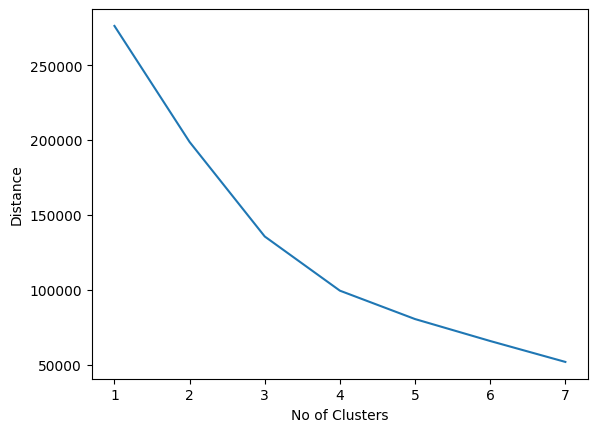

In [106]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.style as style

range_n_clusters = [1, 2, 3, 4, 5, 6, 7]
avg_distance=[]
for n in range_n_clusters:
    model = KMeans(n_clusters=n,n_init=10, random_state=42).fit(RFM_Scaled)
    avg_distance.append(model.inertia_)

plt.plot(range_n_clusters, avg_distance)
plt.xlabel("No of Clusters")
plt.ylabel("Distance")
plt.show()

In [107]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(RFM[["Recency In Days","Frequency","Monetary Value"]])
kmeans_score = silhouette_score(RFM[["Recency In Days","Frequency","Monetary Value"]], kmeans_labels)
print("Silhouette Score for KMeans Clustering: ", kmeans_score)

Silhouette Score for KMeans Clustering:  0.92311450036414


In [108]:
model = KMeans(n_clusters=3,n_init=10, random_state=42).fit(RFM_Scaled)
model_labels_= model.labels_
RFM["K Means Automated Customer Segmentation"]=model_labels_
RFM["K Means Automated Customer Segmentation"].value_counts()

K Means Automated Customer Segmentation
0    51269
1    38055
2     2758
Name: count, dtype: int64

In [109]:
RFM_customers = RFM[["Recency In Days","Frequency","Monetary Value"]]
RFM_customers["Cluster"]=model.labels_
RFM_customers.head()

C:\Users\LEGION\AppData\Local\Temp\ipykernel_15672\3875906184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RFM_customers["Cluster"]=model.labels_


,Recency In Days,Frequency,Monetary Value,Cluster
0,111.0,1,141.90,0
1,114.0,1,27.19,0
2,537.0,1,86.22,1
3,321.0,1,43.62,1
4,288.0,1,196.89,1


In [110]:
RFM_customers.groupby('Cluster').agg({
    'Recency In Days':'mean',
    'Frequency':'mean',
    'Monetary Value':['mean','count']
}).round(2)

Recency In Days Frequency Monetary Value       
                   mean      mean           mean  count
Cluster                                                
0                126.81       1.0         199.00  51269
1                386.27       1.0         199.66  38055
2                219.04       2.1         627.93   2758

In [111]:
RFM[(RFM["K Means Automated Customer Segmentation"]==0)].describe()

,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order,R Quartile Score,F Quartile Score,M Quartile Score,Age Quartile Score,K Means Automated Customer Segmentation
count,51269.000000,51269,51269.0,51269.000000,51269,51269.000000,51269.000000,51269.000000,51269.000000,51269.000000,51269.000000,51269.000000,51269.0
mean,126.812284,2018-04-24 20:41:14.995572480,1.0,199.002953,2018-04-24 20:41:14.995572480,126.812284,126.812284,199.002953,3.307242,2.455675,2.468977,1.673526,0.0
min,0.000000,2017-12-16 05:13:04,1.0,9.590000,2017-12-16 05:13:04,0.000000,0.000000,9.590000,2.000000,1.000000,1.000000,1.000000,0.0
25%,64.000000,2018-02-22 16:06:29,1.0,62.760000,2018-02-22 16:06:29,64.000000,64.000000,62.760000,3.000000,1.000000,1.000000,1.000000,0.0
50%,128.000000,2018-04-23 19:24:50,1.0,110.550000,2018-04-23 19:24:50,128.000000,128.000000,110.550000,3.000000,2.000000,2.000000,2.000000,0.0
75%,188.000000,2018-06-26 09:59:37,1.0,195.300000,2018-06-26 09:59:37,188.000000,188.000000,195.300000,4.000000,3.000000,3.000000,2.000000,0.0
max,256.000000,2018-08-29 15:00:37,1.0,12490.880000,2018-08-29 15:00:37,256.000000,256.000000,12490.880000,4.000000,4.000000,4.000000,3.000000,0.0
std,71.911397,NaN,0.0,381.151052,NaN,71.911397,71.911397,381.151052,0.684403,1.104038,1.114355,0.676710,0.0


In [112]:
RFM[(RFM["K Means Automated Customer Segmentation"]==1)].describe()

,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order,R Quartile Score,F Quartile Score,M Quartile Score,Age Quartile Score,K Means Automated Customer Segmentation
count,38055.000000,38055,38055.0,38055.000000,38055,38055.000000,38055.000000,38055.000000,38055.000000,38055.000000,38055.000000,38055.000000,38055.0
mean,386.267875,2017-08-08 09:57:38.849691392,1.0,199.656852,2017-08-08 09:57:38.849691392,386.267875,386.267875,199.656852,1.411457,2.451925,2.471160,3.575483,1.0
min,256.000000,2016-10-03 16:56:50,1.0,10.070000,2016-10-03 16:56:50,256.000000,256.000000,10.070000,1.000000,1.000000,1.000000,3.000000,1.0
25%,298.000000,2017-05-26 13:36:19.500000,1.0,63.010000,2017-05-26 13:36:19.500000,298.000000,298.000000,63.010000,1.000000,1.000000,1.000000,3.000000,1.0
50%,373.000000,2017-08-21 18:48:07,1.0,108.010000,2017-08-21 18:48:07,373.000000,373.000000,108.010000,1.000000,2.000000,2.000000,4.000000,1.0
75%,460.000000,2017-11-04 21:46:10,1.0,196.010000,2017-11-04 21:46:10,460.000000,460.000000,196.010000,2.000000,3.000000,3.000000,4.000000,1.0
max,695.000000,2017-12-16 19:41:46,1.0,11745.000000,2017-12-16 19:41:46,695.000000,695.000000,11745.000000,2.000000,4.000000,4.000000,4.000000,1.0
std,96.088500,NaN,0.0,375.693729,NaN,96.088500,96.088500,375.693729,0.492104,1.102249,1.113967,0.494276,0.0


In [113]:
RFM[(RFM["K Means Automated Customer Segmentation"]==2)].describe()

,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order,R Quartile Score,F Quartile Score,M Quartile Score,Age Quartile Score,K Means Automated Customer Segmentation
count,2758.000000,2758,2758.000000,2758.000000,2758,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.000000,2758.0
mean,219.044960,2018-01-22 14:57:28.473531392,2.104786,627.933441,2017-10-27 05:20:08.972081408,306.451051,148.428555,386.964935,2.625816,3.987310,3.471356,2.979695,2.0
min,1.000000,2016-10-07 08:28:29,1.000000,35.940000,2016-10-03 09:44:50,7.000000,3.500000,15.620000,1.000000,1.000000,1.000000,1.000000,2.0
25%,104.000000,2017-10-17 12:45:52.500000,2.000000,153.715000,2017-07-04 03:32:58.750000128,191.000000,93.050000,75.157917,2.000000,4.000000,3.000000,2.000000,2.0
50%,198.000000,2018-02-12 12:36:53.500000,2.000000,252.005000,2017-11-03 16:55:33,299.000000,142.000000,123.487500,3.000000,4.000000,4.000000,3.000000,2.0
75%,316.000000,2018-05-17 14:47:42.249999872,2.000000,452.077500,2018-02-19 13:17:06.249999872,421.750000,204.000000,215.837500,4.000000,4.000000,4.000000,4.000000,2.0
max,691.000000,2018-08-28 21:56:12,14.000000,109312.640000,2018-08-22 20:43:48,695.000000,371.000000,109312.640000,4.000000,4.000000,4.000000,4.000000,2.0
std,142.958324,NaN,0.494701,3001.445924,NaN,146.109810,72.574919,2862.874741,1.097668,0.181234,0.749135,1.014380,0.0


Text(0, 0.5, 'Monetary Value')

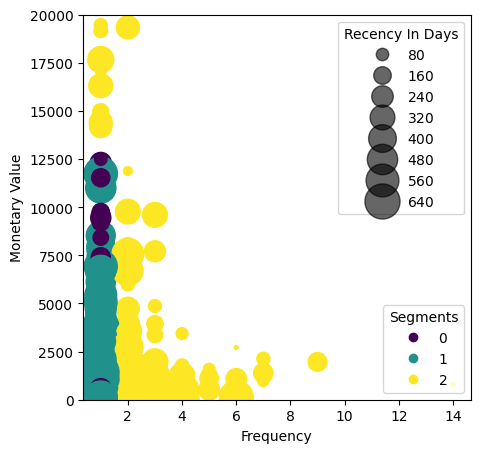

In [114]:
XVariable="Frequency"
YVariable="Monetary Value"
ZVariable="Recency In Days"
x = RFM[XVariable]
y = RFM[YVariable]
z = RFM[ZVariable]

import numpy as np
from matplotlib import pyplot as plt


fig, ax = plt.subplots(figsize=(5, 5))
scatter = ax.scatter(x, y, c=RFM["K Means Automated Customer Segmentation"], s=z)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower right", title="Segments")
ax.add_artist(legend1)

# produce a legend with a cross-section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title=ZVariable)

ax.set_ylim([0, 20000])

plt.xlabel(XVariable)
plt.ylabel(YVariable)

Text(0, 0.5, 'Monetary Value')

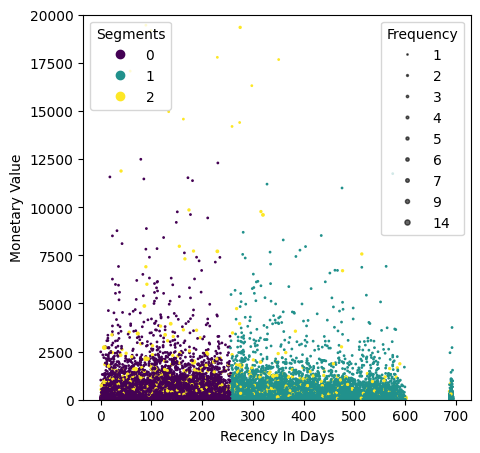

In [115]:
XVariable="Recency In Days"
YVariable="Monetary Value"
ZVariable="Frequency" 
x = RFM[XVariable]
y = RFM[YVariable]
z = RFM[ZVariable]

import numpy as np
from matplotlib import pyplot as plt


fig, ax = plt.subplots(figsize=(5, 5))
scatter = ax.scatter(x, y, c=RFM["K Means Automated Customer Segmentation"], s=z)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="Segments")
ax.add_artist(legend1)

# produce a legend with a cross-section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title=ZVariable)

ax.set_ylim([0, 20000])

plt.xlabel(XVariable)
plt.ylabel(YVariable)

# Segmentation Via K Prototype

In [116]:
#Get the customer data 
unique_customers=customers.drop_duplicates(subset=['customer_unique_id'])
unique_customers=unique_customers.drop(['customer_id'], axis=1)
unique_customers

,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...
99436,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [117]:
RFM = pd.merge(RFM, unique_customers[['customer_unique_id','customer_state']], on='customer_unique_id')

In [118]:
RFM

,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order,R Quartile Score,F Quartile Score,M Quartile Score,Age Quartile Score,Manual Customer Segmentation,K Means Automated Customer Segmentation,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,111.0,2018-05-10 10:56:27,1,141.90,2018-05-10 10:56:27,111.0,111.0,141.90,4,1,3,1,Other,0,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114.0,2018-05-07 11:11:27,1,27.19,2018-05-07 11:11:27,114.0,114.0,27.19,3,1,1,1,Other,0,SP
2,0000f46a3911fa3c0805444483337064,537.0,2017-03-10 21:05:03,1,86.22,2017-03-10 21:05:03,537.0,537.0,86.22,1,1,2,4,Other,1,SC
3,0000f6ccb0745a6a4b88665a16c9f078,321.0,2017-10-12 20:29:41,1,43.62,2017-10-12 20:29:41,321.0,321.0,43.62,2,1,1,3,Other,1,PA
4,0004aac84e0df4da2b147fca70cf8255,288.0,2017-11-14 19:45:42,1,196.89,2017-11-14 19:45:42,288.0,288.0,196.89,2,1,3,3,Lost Customers,1,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92077,fffcf5a5ff07b0908bd4e2dbc735a684,447.0,2017-06-08 21:00:36,1,4134.84,2017-06-08 21:00:36,447.0,447.0,4134.84,1,4,4,4,Lost Customers,1,PE
92078,fffea47cd6d3cc0a88bd621562a9d061,262.0,2017-12-10 20:07:56,1,84.58,2017-12-10 20:07:56,262.0,262.0,84.58,2,4,2,3,Loyal Return Customers,1,BA
92079,ffff371b4d645b6ecea244b27531430a,568.0,2017-02-07 15:49:16,1,112.46,2017-02-07 15:49:16,568.0,568.0,112.46,1,4,2,4,Loyal Return Customers,1,MT
92080,ffff5962728ec6157033ef9805bacc48,119.0,2018-05-02 15:17:41,1,133.69,2018-05-02 15:17:41,119.0,119.0,133.69,3,4,3,2,Loyal Return Customers,0,ES


In [119]:
RFM['customer_state'].value_counts()

customer_state
SP    38634
RJ    11739
MG    10843
RS     5092
PR     4703
SC     3393
BA     3119
DF     1988
ES     1911
GO     1849
PE     1529
CE     1242
PA      905
MT      843
MA      692
MS      671
PB      496
RN      458
PI      457
AL      384
SE      326
TO      264
RO      226
AM      140
AC       74
AP       66
RR       38
Name: count, dtype: int64

In [120]:
#Reusing the original scaled RFM Data
RFMScaledWithCustomerState=pd.DataFrame(RFM_Scaled)

RFMScaledWithCustomerState[3]=RFM["customer_state"].values

# RFMScaledWithCustomerState[3] = RFMScaledWithCustomerState[3].astype('str') 

RFMScaledWithCustomerState.dtypes

0    float64
1    float64
2    float64
3     object
dtype: object

In [121]:
#finds the columns that have categorical data

categorical_index = [RFMScaledWithCustomerState.columns.get_loc(col) for col in list(RFMScaledWithCustomerState.select_dtypes('object').columns)]
categorical_index

[3]

In [122]:
RFMScaledWithCustomerState

,0,1,2,3
0,-0.824424,-0.159966,-0.109098,SP
1,-0.804764,-0.159966,-0.287317,SP
2,1.967328,-0.159966,-0.195605,SC
3,0.551792,-0.159966,-0.261791,PA
4,0.335529,-0.159966,-0.023663,SP
...,...,...,...,...
92077,1.377521,-0.159966,6.094534,PE
92078,0.165141,-0.159966,-0.198153,BA
92079,2.170484,-0.159966,-0.154837,MT
92080,-0.771997,-0.159966,-0.121853,ES


In [123]:
#put figures into matrix as K Prototype works with arrays rather than dataframes
dfMatrix = RFMScaledWithCustomerState.to_numpy()

In [124]:
dfMatrix

array([[-0.8244239021535809, -0.15996587711791627, -0.10909782589911733,
        'SP'],
       [-0.804763675905544, -0.15996587711791627, -0.2873170309398674,
        'SP'],
       [1.9673282250676574, -0.15996587711791627, -0.19560506447176979,
        'SC'],
       ...,
       [2.170483896297372, -0.15996587711791627, -0.1548372853743129,
        'MT'],
       [-0.7719966321588159, -0.15996587711791627, -0.12185329336825305,
        'ES'],
       [1.6199975613523392, -0.15996587711791627, -0.21838157520228496,
        'PR']], dtype=object)

In [125]:
# Choose optimal K using Elbow method
from kmodes.kprototypes import KPrototypes
cost = []
for cluster in range(1, 8):
    kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
    kprototype.fit_predict(dfMatrix, categorical = categorical_index)
    cost.append(kprototype.cost_)

In [126]:
df_cost = pd.DataFrame(cost,range(1,8))

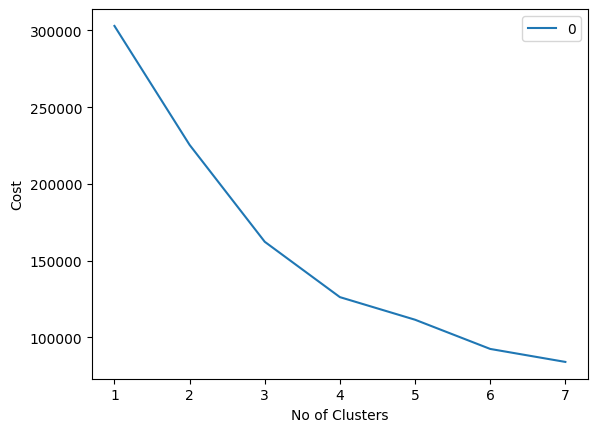

In [127]:
df_cost.plot()

plt.xlabel("No of Clusters")
plt.ylabel("Cost")
plt.show()


In [128]:
#Ideal number also appears to be 3 clusters

kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 0)
kprototype.fit_predict(dfMatrix, categorical = categorical_index)

array([0, 0, 2, ..., 2, 0, 2], dtype=uint16)

In [129]:
RFM['K Prototype Automated Customer Segmentation'] = kprototype.labels_

In [130]:
RFM

,customer_unique_id,Recency In Days,Most Recent Order Date,Frequency,Monetary Value,Earliest Order Date,Age In Days,Average Time Between Orders In Days,Average Monetary Value Per Order,R Quartile Score,F Quartile Score,M Quartile Score,Age Quartile Score,Manual Customer Segmentation,K Means Automated Customer Segmentation,customer_state,K Prototype Automated Customer Segmentation
0,0000366f3b9a7992bf8c76cfdf3221e2,111.0,2018-05-10 10:56:27,1,141.90,2018-05-10 10:56:27,111.0,111.0,141.90,4,1,3,1,Other,0,SP,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114.0,2018-05-07 11:11:27,1,27.19,2018-05-07 11:11:27,114.0,114.0,27.19,3,1,1,1,Other,0,SP,0
2,0000f46a3911fa3c0805444483337064,537.0,2017-03-10 21:05:03,1,86.22,2017-03-10 21:05:03,537.0,537.0,86.22,1,1,2,4,Other,1,SC,2
3,0000f6ccb0745a6a4b88665a16c9f078,321.0,2017-10-12 20:29:41,1,43.62,2017-10-12 20:29:41,321.0,321.0,43.62,2,1,1,3,Other,1,PA,2
4,0004aac84e0df4da2b147fca70cf8255,288.0,2017-11-14 19:45:42,1,196.89,2017-11-14 19:45:42,288.0,288.0,196.89,2,1,3,3,Lost Customers,1,SP,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92077,fffcf5a5ff07b0908bd4e2dbc735a684,447.0,2017-06-08 21:00:36,1,4134.84,2017-06-08 21:00:36,447.0,447.0,4134.84,1,4,4,4,Lost Customers,1,PE,2
92078,fffea47cd6d3cc0a88bd621562a9d061,262.0,2017-12-10 20:07:56,1,84.58,2017-12-10 20:07:56,262.0,262.0,84.58,2,4,2,3,Loyal Return Customers,1,BA,2
92079,ffff371b4d645b6ecea244b27531430a,568.0,2017-02-07 15:49:16,1,112.46,2017-02-07 15:49:16,568.0,568.0,112.46,1,4,2,4,Loyal Return Customers,1,MT,2
92080,ffff5962728ec6157033ef9805bacc48,119.0,2018-05-02 15:17:41,1,133.69,2018-05-02 15:17:41,119.0,119.0,133.69,3,4,3,2,Loyal Return Customers,0,ES,0


In [131]:
RFM["K Prototype Automated Customer Segmentation"].value_counts()

K Prototype Automated Customer Segmentation
0    51270
2    38054
1     2758
Name: count, dtype: int64

<p>Unfortunately it appears that adding the Customer State info doesn't actually make much of a difference </p>

In [132]:
CompareKMeansVsKProto=RFM[["K Means Automated Customer Segmentation","K Prototype Automated Customer Segmentation"]]
# CompareKMeansVsKProto=CompareKMeansVsKProto.groupby(["K Means Automated Customer Segmentation"])
# CompareKMeansVsKProto.aggregate(np.sum)

CompareKMeansVsKProto.pivot_table(index=['K Means Automated Customer Segmentation'], 
                                  columns='K Prototype Automated Customer Segmentation', aggfunc='size', fill_value=0)

K Prototype Automated Customer Segmentation,0,1,2
K Means Automated Customer Segmentation,,,
0,51269,0,0
1,1,0,38054
2,0,2758,0
